In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv", encoding = "latin-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5443,spam,You have won a guaranteed 32000 award or maybe...,NaN,NaN,NaN
1797,ham,Can i get your opinion on something first?,NaN,NaN,NaN
1661,ham,"You aren't coming home between class, right? I...",NaN,NaN,NaN
1271,ham,If you still havent collected the dough pls le...,NaN,NaN,NaN
4768,ham,watever reLation u built up in dis world only ...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
df.sample(5)

,v1,v2
1275,ham,Wot u up 2 u weirdo?
308,spam,TheMob> Check out our newest selection of cont...
594,ham,I met you as a stranger and choose you as my f...
2088,spam,Well done ENGLAND! Get the official poly ringt...
5016,spam,Dear 0776xxxxxxx U've been invited to XCHAT. T...


In [7]:
# renaming the columns
df.rename(columns = {'v1': 'target', 'v2':'text'}, inplace= True)
df.sample(5)

,target,text
1010,ham,Lol I would but my mom would have a fit and te...
317,ham,"Not really dude, have no friends i'm afraid :("
871,ham,Its going good...no problem..but still need li...
2353,spam,Please CALL 08712402902 immediately as there i...
5544,ham,"I'm taking derek &amp; taylor to walmart, if I..."


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [9]:
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# remove duplicate
df = df.drop_duplicates(keep = "first")

In [13]:
df.shape

(5169, 2)

# 2. EDA

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

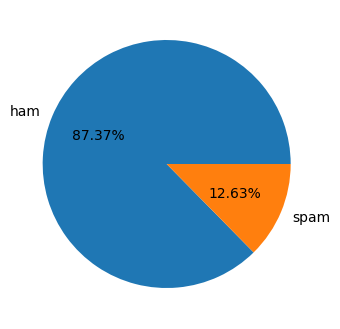

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,8))
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f%%")
plt.show()

In [17]:
# data is imbalanced

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maury\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\maury\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [20]:
df['num_characters']= df['text'].apply(len)

In [21]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# numbers of words
df['num_words']= df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [23]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
# ham
df[df['target']== 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# spam
df[df['target']== 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

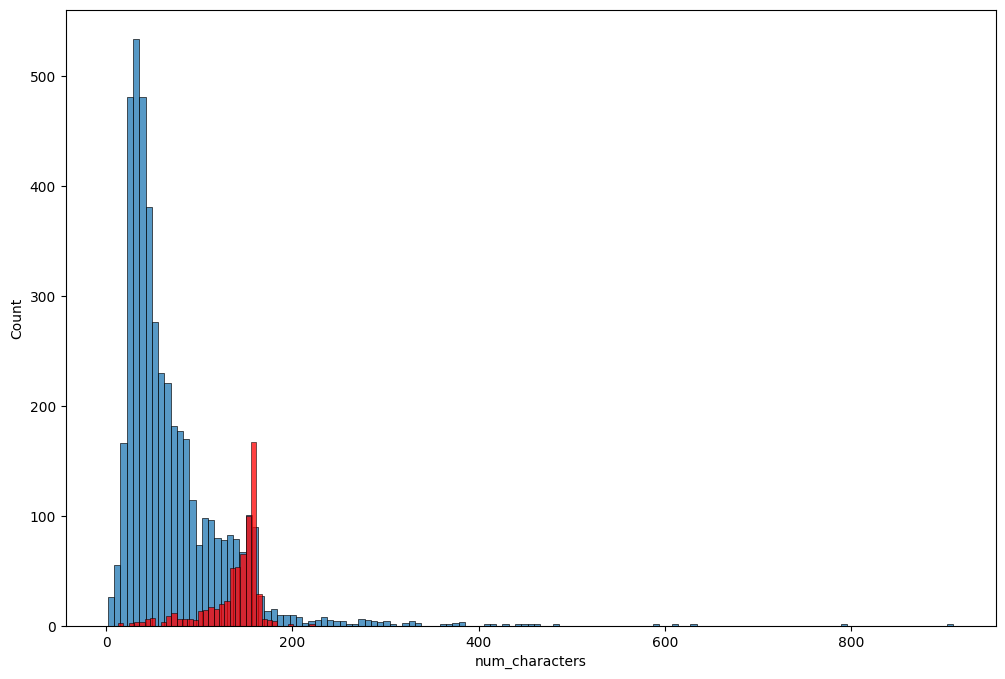

In [30]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color ='red')

<Axes: xlabel='num_words', ylabel='Count'>

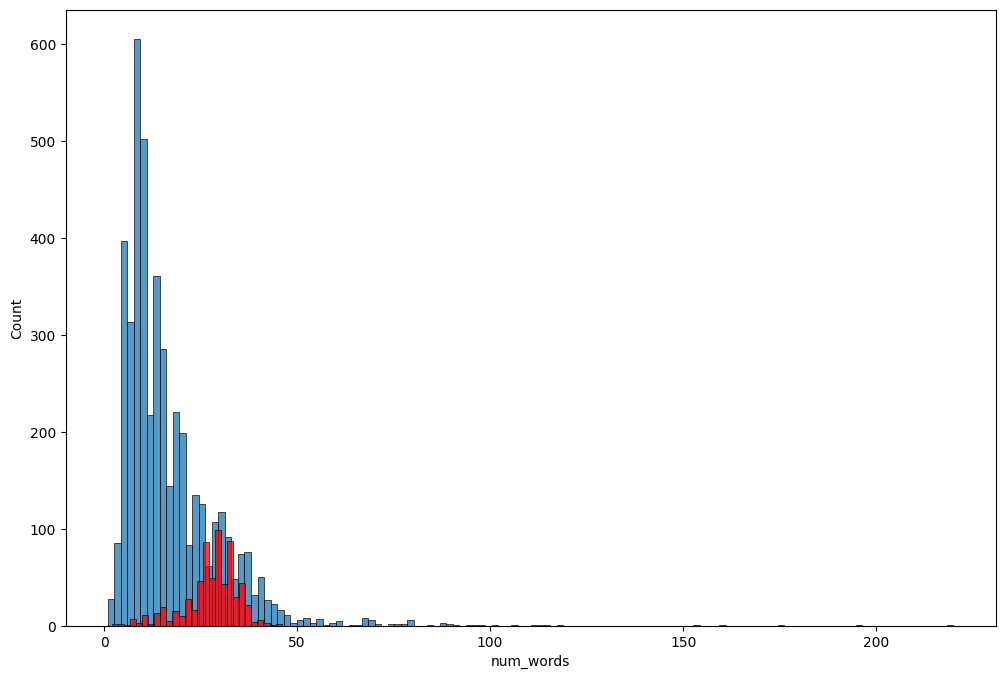

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color ='red')

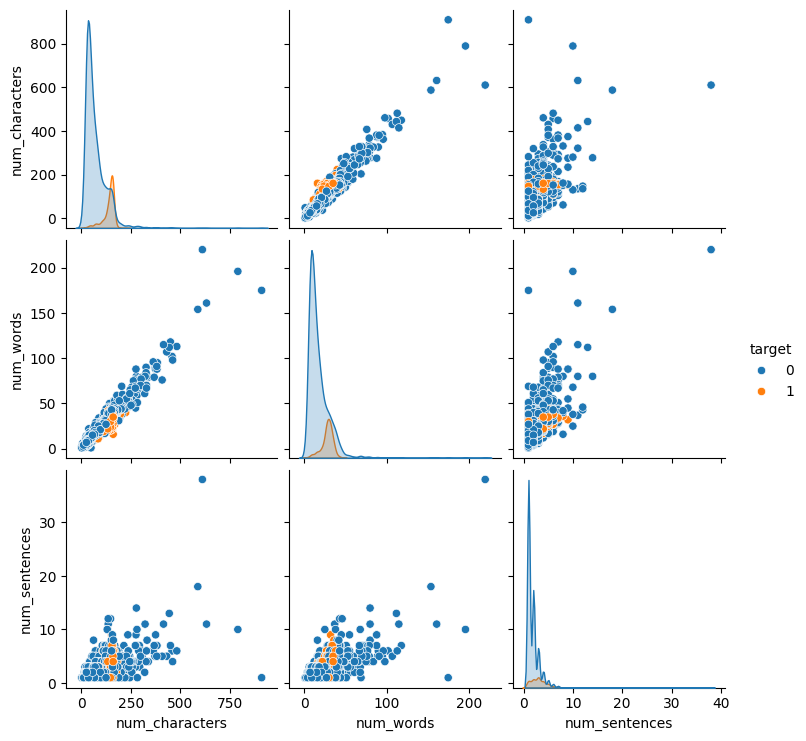

In [32]:
sns.pairplot(df, hue='target')

<Axes: >

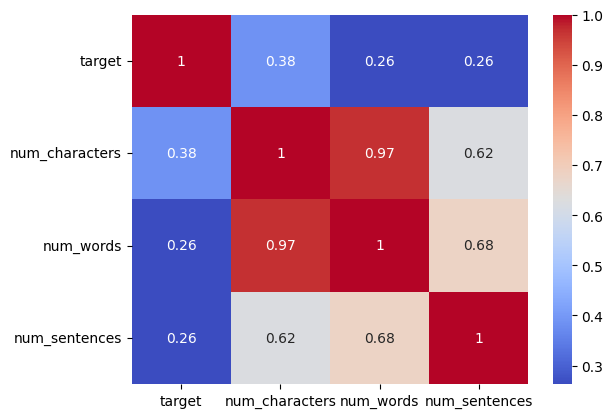

In [33]:
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap= 'coolwarm')

# 3. data preprocessing 
# - lower case
# - tokenization
# - removing Special characters
# - removing stop words and punctuation
# - stemming

In [34]:
import nltk 
import string 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def transform_text(text):
    text = text.lower()
    text= nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum() and i not in stop_words:
            y.append(ps.stem(i))
    return " ".join(y)

In [35]:
df['transformed_text']= df['text'].apply(transform_text)

In [36]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
from wordcloud import WordCloud
wc = WordCloud(
    width=500,
    height=500,
    background_color='white',
    min_font_size=10
)


In [38]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

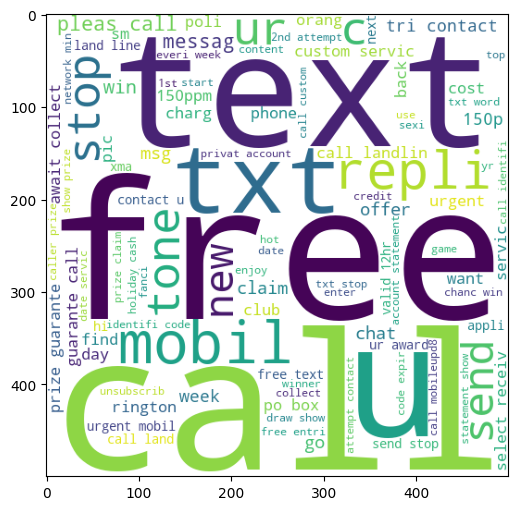

In [39]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [40]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

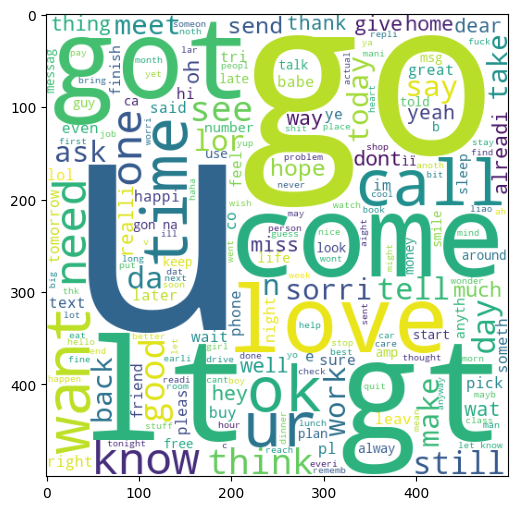

In [41]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [42]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [43]:
len(spam_corpus)

9939

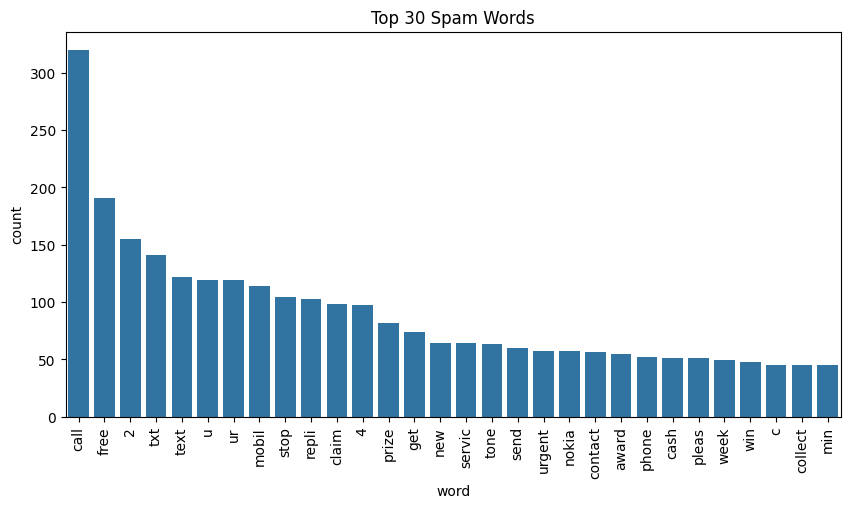

In [44]:
from collections import Counter
spam_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=["word","count"])
plt.figure(figsize =(10,5))
sns.barplot(
    x = 'word',
    y= 'count',
    data = spam_df
)
plt.xticks(rotation = 90)
plt.title("Top 30 Spam Words")
plt.show()

In [45]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

In [46]:
len(ham_corpus)

35404

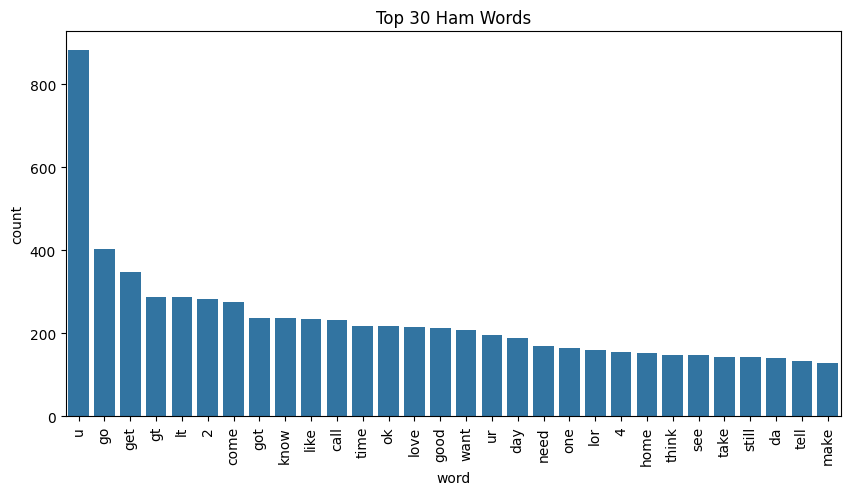

In [47]:
from collections import Counter
spam_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=["word","count"])
plt.figure(figsize =(10,5))
sns.barplot(
    x = 'word',
    y= 'count',
    data = spam_df
)
plt.xticks(rotation = 90)
plt.title("Top 30 Ham Words")
plt.show()

# 4. Model Building

In [48]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000)
cv = CountVectorizer()

In [49]:
X= tfidf.fit_transform(df['transformed_text']).toarray()

In [50]:
X.shape

(5169, 3000)

In [51]:
y= df['target'].values

In [52]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state =2)

In [55]:
# Apply SMOTE only on training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=2)
X, y = smote.fit_resample(X,y)

In [56]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [57]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [58]:
gnb.fit(X_train, y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [59]:
mnb.fit(X_train, y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [60]:
bnb.fit(X_train, y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [61]:
# tfidf --> mnb

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [63]:
svc = SVC(probability = True)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth =5)
lrc = LogisticRegression(solver = 'liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators= 50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [64]:
clfs= {
    'SVC': svc,
    'NB':mnb,
    'DT':dtc,
    'RF':rfc,
    'ETC': etc,
}

In [65]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [66]:
train_classifier(svc,X_train, y_train, X_test, y_test)

(0.9738878143133463, 0.9826086956521739)

In [67]:
accuracy_scores= []
precision_scores= []
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8415841584158416
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406


In [68]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [69]:
performance_df

,Algorithm,Accuracy,Precision
1,NB,0.970986,1.000000
0,SVC,0.973888,0.982609
3,RF,0.973888,0.982609
4,ETC,0.974855,0.974576
2,DT,0.933269,0.841584


In [70]:
performance_df1= pd.melt(performance_df, id_vars = "Algorithm")

In [71]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.970986
1,SVC,Accuracy,0.973888
2,RF,Accuracy,0.973888
3,ETC,Accuracy,0.974855
4,DT,Accuracy,0.933269
5,NB,Precision,1.000000
6,SVC,Precision,0.982609
7,RF,Precision,0.982609
8,ETC,Precision,0.974576
9,DT,Precision,0.841584


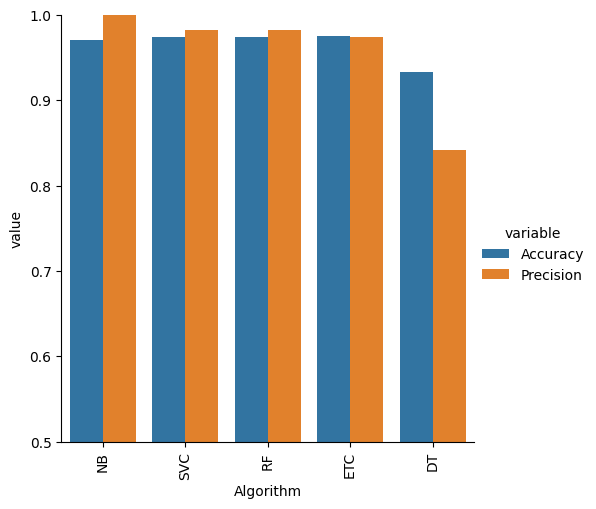

In [72]:
sns.catplot(x = 'Algorithm', y = 'value',
           hue = 'variable', data = performance_df1, kind='bar', height =5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [73]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [74]:
performance_df = performance_df.merge(
    pd.DataFrame({
        "Algorithm": list(clfs.keys()),
        "Accuracy_max_ft_3000": accuracy_scores,
        "Precision_max_ft_3000": precision_scores
    }),
    on="Algorithm"
)

In [75]:
performance_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,NB,0.970986,1.000000,0.970986,1.000000
1,SVC,0.973888,0.982609,0.973888,0.982609
2,RF,0.973888,0.982609,0.973888,0.982609
3,ETC,0.974855,0.974576,0.974855,0.974576
4,DT,0.933269,0.841584,0.933269,0.841584


In [76]:
performance_df = performance_df.merge(
    pd.DataFrame({
        "Algorithm": list(clfs.keys()),
        "Accuracy_scaling": accuracy_scores,
        "Precision_scaling": precision_scores
    }),
    on="Algorithm"
)

In [77]:
performance_df


,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
1,SVC,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609
2,RF,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609
3,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
4,DT,0.933269,0.841584,0.933269,0.841584,0.933269,0.841584


In [78]:
# voting classifier
svc = SVC (probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators = [("svm", svc), ("nb", mnb), ("etc", etc)], voting = "soft")
voting.fit(X_train, y_train)

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('svm', ...), ('nb', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0


In [79]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9787234042553191
Precision 0.9833333333333333


In [80]:
mnb.fit(X_train, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [81]:
import pickle
mnb.fit(X_train, y_train)
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(mnb, open("model.pkl", "wb"))

In [82]:
# 1. Manually fit the specific MultinomialNB model
mnb.fit(X_train, y_train)

# 2. Verify it works in the notebook first
sample_test = "Check if this works"
sample_vec = tfidf.transform([sample_test])
print("Test Prediction:", mnb.predict(sample_vec)) # Should print [0] or [1]

# 3. Save the FITTED model and the vectorizer
import pickle
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

with open('model.pkl', 'wb') as f:
    pickle.dump(mnb, f)

print("Files saved successfully!")

Test Prediction: [0]
Files saved successfully!


In [83]:
import os
print(os.getcwd())

C:\Users\maury\Desktop\sms_spam_detection
